In [14]:
# Data Exploration
## Importing Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
df = pd.read_csv('F:/Portfolio Projects/Modeling Car Insurance Claim Outcomes/car_insurance.csv')

# Check for missing values
print(df.isnull().sum())



id                       0
age                      0
gender                   0
driving_experience       0
education                0
income                   0
credit_score           982
vehicle_ownership        0
vehicle_year             0
married                  0
children                 0
postal_code              0
annual_mileage         957
vehicle_type             0
speeding_violations      0
duis                     0
past_accidents           0
outcome                  0
dtype: int64


In [16]:
# Imputing Missing Values

from sklearn.impute import SimpleImputer

# Separate numerical and categorical columns
numerical_columns = ['credit_score', 'annual_mileage']

# Imputing missing values for numerical columns
num_imputer = SimpleImputer(strategy='mean')
df[numerical_columns] = num_imputer.fit_transform(df[numerical_columns])


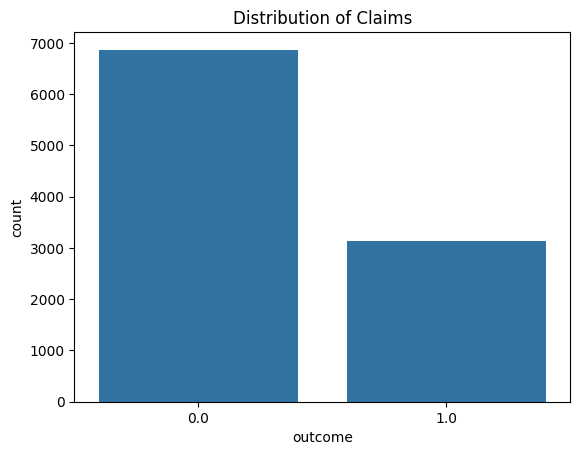

In [17]:
# Distribution of claims
sns.countplot(data=df, x='outcome')
plt.title("Distribution of Claims")
plt.show()


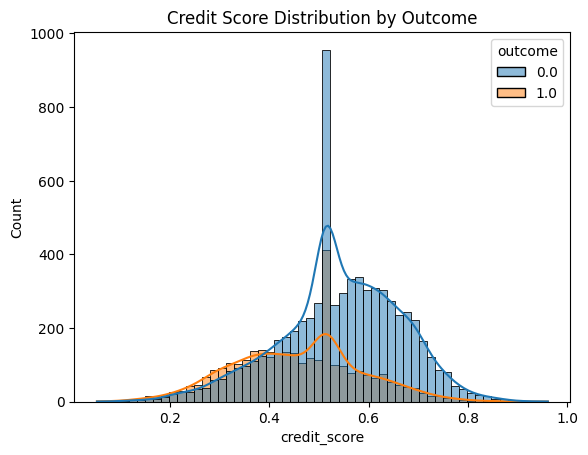

In [18]:
# Distribution of key predictors
sns.histplot(data=df, x='credit_score', hue='outcome', kde=True)
plt.title("Credit Score Distribution by Outcome")
plt.show()

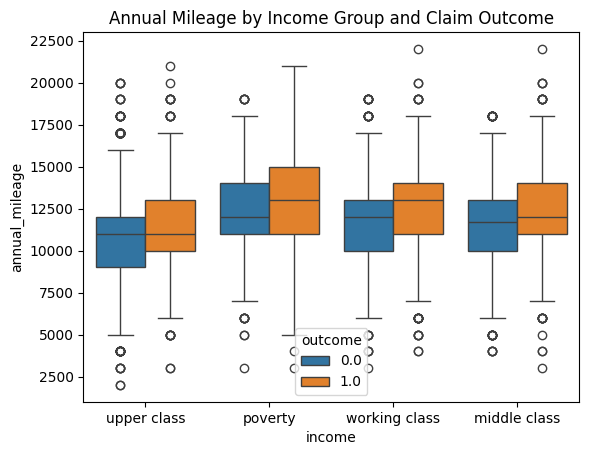

In [19]:
sns.boxplot(data=df, x='income', y='annual_mileage', hue='outcome')
plt.title("Annual Mileage by Income Group and Claim Outcome")
plt.show()

In [20]:
# Data Preprocessing

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Encode categorical variables
categorical_columns = ['age', 'gender', 'driving_experience', 'education', 'income', 
                       'vehicle_ownership', 'vehicle_year', 'married', 'vehicle_type']
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Scale numerical features
scaler = StandardScaler()
numerical_columns = ['credit_score', 'annual_mileage', 'speeding_violations', 'duis', 'past_accidents', 'children']
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

# Split dataset
X = df_encoded.drop(columns=['id', 'postal_code', 'outcome'])
y = df_encoded['outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [21]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve

# Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Feature importance
import numpy as np
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': np.abs(model.coef_[0])})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance.head(10))





Accuracy: 0.8476666666666667
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.90      0.89      2063
         1.0       0.77      0.73      0.75       937

    accuracy                           0.85      3000
   macro avg       0.83      0.81      0.82      3000
weighted avg       0.85      0.85      0.85      3000

                      Feature  Importance
12    driving_experience_30y+    3.541069
11  driving_experience_20-29y    2.983811
19   vehicle_year_before 2015    1.638887
18      vehicle_ownership_1.0    1.636587
10  driving_experience_10-19y    1.622848
9                    gender_1    0.951916
5              past_accidents    0.439411
20                married_1.0    0.406045
3         speeding_violations    0.149138
8                       age_3    0.136449


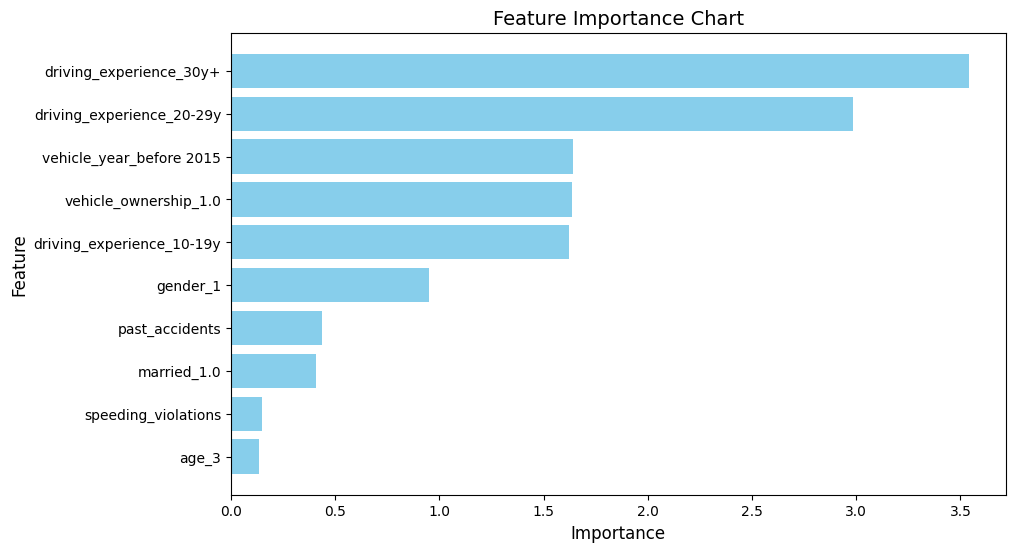

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `importance_df` contains the feature importance data
importance_df = pd.DataFrame({
    'Feature': ['driving_experience_30y+', 'driving_experience_20-29y', 'vehicle_year_before 2015',
                'vehicle_ownership_1.0', 'driving_experience_10-19y', 'gender_1',
                'past_accidents', 'married_1.0', 'speeding_violations', 'age_3'],
    'Importance': [3.541069, 2.983811, 1.638887, 1.636587, 1.622848, 0.951916, 
                   0.439411, 0.406045, 0.149138, 0.136449]
})

# Sort by importance
importance_df = importance_df.sort_values(by="Importance", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Importance Chart', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.show()


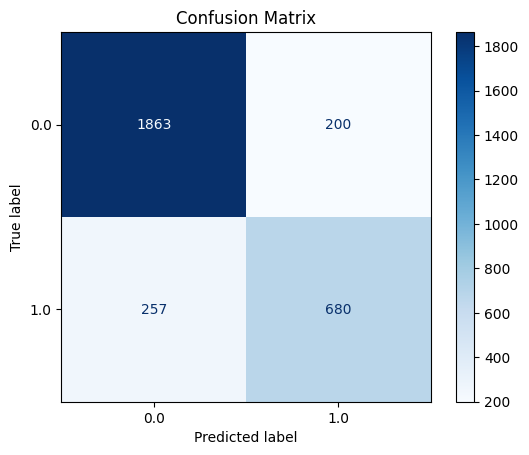

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you have predictions and true labels
y_true = y_test  # True labels
y_pred = model.predict(X_test)  # Predicted labels

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


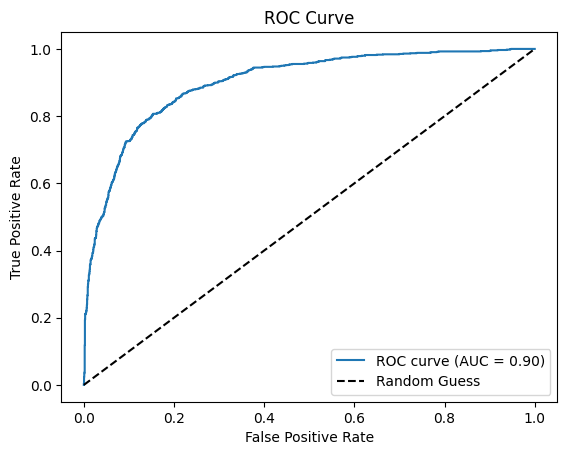

In [22]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc_score(y_test, y_proba):.2f})')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()